# Chapter 14 - Why the Mean Matters?
the empirical distribution of the sample mean has almost always turned out close to bell-shaped, regardless of the population being studied.  If a property of random samples is true regardless of the population, it becomes a powerful tool for inference because we rarely know much about the data in the entire population. The distribution of the mean of a large random sample falls into this category of properties. That is why random sample means are extensively used in data science.
<br>
Questions we will address are as following.
- What exactly does the mean measure?
- How close to the mean are most of the data?
- How is the sample size related to the variability of the sample mean?
- Why do empirical distributions of random sample means come out bell shaped?
- How can we use sample means effectively for inference?


In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore')

# Properties of the Mean
- Mean and Average are words used interchangeably.  The average or mean is **the sum of all the elements of the collection, divided by the number of elements in the collection.**

```
# Both represents mean or average
np.average(array)
np.mean(array)
```


In [2]:
not_symmetric = make_array(2, 3, 3, 9)
np.average(not_symmetric)

4.25

In [3]:
np.mean(not_symmetric)

4.25

# Basic Properties
- It need not be an element of the collection.
- It need not be an integer even if all the elements of the collection are integers.
- It is somewhere between the smallest and largest values in the collection.
- It need not be halfway between the two extremes; it is not in general true that half the elements in a collection are above the mean.
- If the collection consists of values of a variable measured in specified units, then the mean has the same units too.

The **Mean is a "Smoother" or "Equalizing"**<br>
The not_symmetric array is the amount of money four individuals have in their pocket or purse.  When we take the average we combine what everyone has and divide it equally among the individuals.  So each person gets $4.25.

# Proportions are Means
If I am looking at a characteristic that is either present or not, I can define the presence of the characteristic as 1 and the absence of the characteristic as 0.  If the values are 0 and 1 the sum of the array is number of ones in it.  Therefore, the average or mean is the percent that the characteristic is present in the population.  Percents can also be determined if the results in the column is True or False.  True will be treated as an 1 and False treated as an 0.

In [4]:
zero_one = make_array(1, 1, 1, 0)
sum(zero_one)

3

In [5]:
np.mean(zero_one)

0.75

In [6]:
np.mean(make_array(True, True, True, False))

0.75

In [7]:
same_distribution = make_array(2, 2, 3, 3, 3, 3, 9, 9)
np.mean(same_distribution)

4.25

In [8]:
example = Table().with_columns('same_distribution', same_distribution)

The mean is the center of gravity or balance point of the histogram.

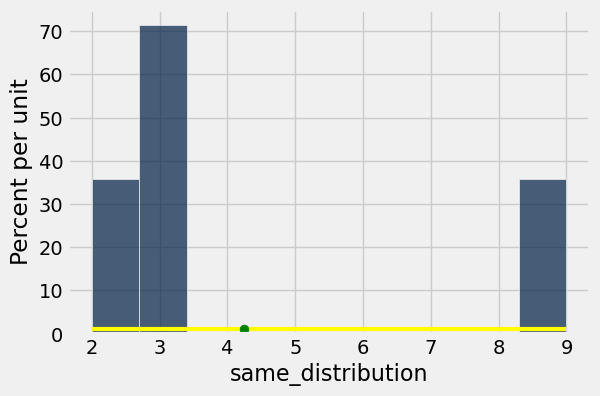

In [17]:
example.hist()

# Plotting parameters; you can ignore this code

plots.plot([2, 9], [0.01, 0.01], color='yellow', lw=3, zorder=1)
plots.scatter(4.25, 0.01, color='green', s=40, zorder=2);

# The Mean and the Median
Unlike the median, the mean does not indicate that 50% of the data is to the left of the mean and 50% of the data is to right of the mean.  Large values in the data set will move the mean to the right of the median for a non-symmetric dataset.  If the data is symmetric then the mean and median will be close or the same.


In [19]:
symmetric = make_array(2, 3, 3, 4)

In [20]:
np.average(symmetric)

3.0

In [21]:
np.median(symmetric)

3.0

In [25]:
two_distributions = Table().with_columns('Symmetric', make_array(2, 2, 3, 3, 3, 3, 4, 4),
                                        'Not Symmetric', make_array(2, 2, 3, 3, 3, 3, 9, 9),
                                         )

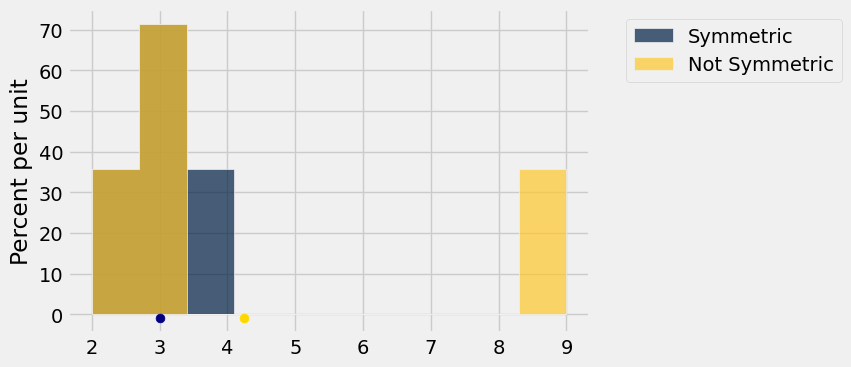

In [29]:
two_distributions.hist()
plots.scatter(3.0, -0.01, color='navy', s=40, zorder=2);
plots.scatter(4.25, -0.01, color='gold', s=40, zorder=2);

In [31]:
np.median(not_symmetric)

3.0

In [32]:
np.median(same_distribution)

3.0

# Comparing Mean and Median
The median of the symmetric and non-symmetric distribution is 3.0.  However, the mean of the non-symmetric distribution is 4.25 and the mean of the symmetric distribution is 3.0.<br>
<br>
In general, if the histogram has a tail on one side (the formal term is “skewed”), then the mean is pulled away from the median in the direction of the tail.


In [40]:
# We go back to the 2019 San Francisco Salary table
sf2019 = Table.read_table('san_francisco_2019.csv')
sf2019

Organization Group | Department      | Job Family                    | Job                            | Salary | Overtime | Benefits | Total Compensation
Public Protection  | Adult Probation | Information Systems           | IS Trainer-Journey             | 91332  | 0        | 40059    | 131391
Public Protection  | Adult Probation | Information Systems           | IS Engineer-Assistant          | 123241 | 0        | 49279    | 172520
Public Protection  | Adult Probation | Information Systems           | IS Business Analyst-Senior     | 115715 | 0        | 46752    | 162468
Public Protection  | Adult Probation | Information Systems           | IS Business Analyst-Principal  | 159394 | 0        | 57312    | 216706
Public Protection  | Adult Probation | Information Systems           | IS Programmer Analyst          | 70035  | 0        | 28671    | 98706
Public Protection  | Adult Probation | Information Systems           | IS Project Director            | 175742 | 0        | 60830    | 236572
Public Protection  | Adult Probation | Information Systems           | IT Operations Support Admin IV | 123840 | 0        | 49429    | 173269
Public Protection  | Adult Probation | Payroll, Billing & Accounting | Accountant III                 | 111816 | 0        | 46319    | 158135
Public Protection  | Adult Probation | Budget, Admn & Stats Analysis | Statistician                   | 87725  | 0        | 38899    | 126624
Public Protection  | Adult Probation | Budget, Admn & Stats Analysis | Senior Administrative Analyst  | 116192 | 0        | 47651    | 163843
... (44515 rows omitted)

In [41]:
# make sure the salary information includes Part-Times making $15,600 or more
sf2019=sf2019.where('Salary', are.above(15600))
sf2019

Organization Group | Department      | Job Family                    | Job                            | Salary | Overtime | Benefits | Total Compensation
Public Protection  | Adult Probation | Information Systems           | IS Trainer-Journey             | 91332  | 0        | 40059    | 131391
Public Protection  | Adult Probation | Information Systems           | IS Engineer-Assistant          | 123241 | 0        | 49279    | 172520
Public Protection  | Adult Probation | Information Systems           | IS Business Analyst-Senior     | 115715 | 0        | 46752    | 162468
Public Protection  | Adult Probation | Information Systems           | IS Business Analyst-Principal  | 159394 | 0        | 57312    | 216706
Public Protection  | Adult Probation | Information Systems           | IS Programmer Analyst          | 70035  | 0        | 28671    | 98706
Public Protection  | Adult Probation | Information Systems           | IS Project Director            | 175742 | 0        | 60830    | 236572
Public Protection  | Adult Probation | Information Systems           | IT Operations Support Admin IV | 123840 | 0        | 49429    | 173269
Public Protection  | Adult Probation | Payroll, Billing & Accounting | Accountant III                 | 111816 | 0        | 46319    | 158135
Public Protection  | Adult Probation | Budget, Admn & Stats Analysis | Statistician                   | 87725  | 0        | 38899    | 126624
Public Protection  | Adult Probation | Budget, Admn & Stats Analysis | Senior Administrative Analyst  | 116192 | 0        | 47651    | 163843
... (36921 rows omitted)

In [42]:
sf2019.column('Total Compensation').min(), sf2019.column('Total Compensation').max()

(16702.0, 724031.0)

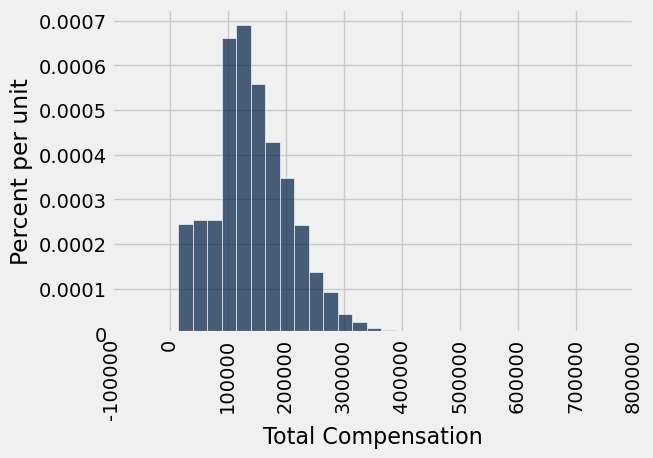

In [43]:
sf2019.select('Total Compensation').hist(bins = np.arange(15000,726000, 25000)) 

In [45]:
np.median(sf2019.column('Total Compensation'))

136164.0

In [46]:
np.mean(sf2019.column('Total Compensation'))

143246.77885787009

The mean is affected by the higher compensation values.  While the median is not affected by the higher compensation values.

# Variability
How spread out a data set is a characteristic of the distribution.  Looking a histograms above we see that Total Compensation is between $16.702 to $724,031.  We want to know if how far the values are from the mean.  Let explore the computation of the variability.

In [47]:
any_numbers = make_array(1, 2, 2, 10)

In [48]:
# Step 1: Compute the mean
mean = np.mean(any_numbers)
mean

3.75

In [51]:
# Step 2: Compute the distance each point is from the mean
deviations = any_numbers - mean
calculation_steps = Table().with_columns(
        'Value', any_numbers,
        'Deviation from Mean', deviations)
calculation_steps

Value | Deviation from Mean
1     | -2.75
2     | -1.75
2     | -1.75
10    | 6.25

In [52]:
sum(deviations)

0.0

In [53]:
np.mean(deviations)

0.0

In [54]:
# Step 3. The squared deviations from average

squared_deviations = deviations ** 2
calculation_steps = calculation_steps.with_column(
   'Squared Deviations from Average', squared_deviations
    )
calculation_steps

Value | Deviation from Mean | Squared Deviations from Average
1     | -2.75               | 7.5625
2     | -1.75               | 3.0625
2     | -1.75               | 3.0625
10    | 6.25                | 39.0625

In [56]:
# Step 4. Variance = the mean squared deviation from average

variance = np.mean(squared_deviations)
variance

13.1875

**Variance:** The mean squared deviation calculated above is called the variance of the values.

While the variance does give us an idea of spread, it is not on the same scale as the original variable as its units are the square of the original. This makes interpretation very difficult.<br>
So we return to the original scale by taking the positive square root of the variance.

In [57]:
# Step 5.
# Standard Deviation:    root mean squared deviation from average
# Steps of calculation:   5    4      3       2             1

sd = variance ** 0.5
sd

3.6314597615834874

# Standard Deviation
The quantity that we have just computed is called the standard deviation of the list, and is abbreviated as SD. It measures roughly how far the numbers on the list are from their average.

**Definition.** The SD of a list is defined as the root mean square of deviations from average. That’s a mouthful. But read it from right to left and you have the sequence of steps in the calculation.

**Computation.** The five steps described above result in the SD. You can also use the function np.std to compute the SD of values in an array:

```
np.std(array)
```
You can use this function instead of doing the 5 steps above.

In [58]:
np.std(calculation_steps.column('Value'))

3.6314597615834874

# Working with the Standard Deviation
Let's take the 2013 season of the nba table with players who earned $543,471 the lowest paid salary of a player in the NBA.  If salaries are reported lower those players sign with the team late in the season so we will ignore those salaries.

In [91]:
nba13 = Table.read_table("nba.csv").where('season', 2013).where('salary', are.above(543471))
nba13 

rank | name              | position | team               | salary   | season
1    | Kobe Bryant       | SF       | Los Angeles Lakers | 30453805 | 2013
2    | Dirk Nowitzki     | F        | Dallas Mavericks   | 20907128 | 2013
3    | Amar'e Stoudemire | C        | New York Knicks    | 19948799 | 2013
4    | Joe Johnson       | G        | Brooklyn Nets      | 19752645 | 2013
5    | Carmelo Anthony   | PF       | New York Knicks    | 19444503 | 2013
6    | Pau Gasol         | PF       | Los Angeles Lakers | 19285850 | 2013
7    | Chris Bosh        | PF       | Miami Heat         | 19067500 | 2013
8    | LeBron James      | SF       | Miami Heat         | 19067500 | 2013
9    | Dwyane Wade       | G        | Miami Heat         | 18673000 | 2013
10   | Chris Paul        | PG       | LA Clippers        | 18668431 | 2013
... (580 rows omitted)

In [92]:
nba13 = nba13.with_columns('salary per million', nba13.column('salary')/1000000)
nba13.column('salary per million').min(), nba13.column('salary per million').max()

(0.55000000000000004, 30.453804999999999)

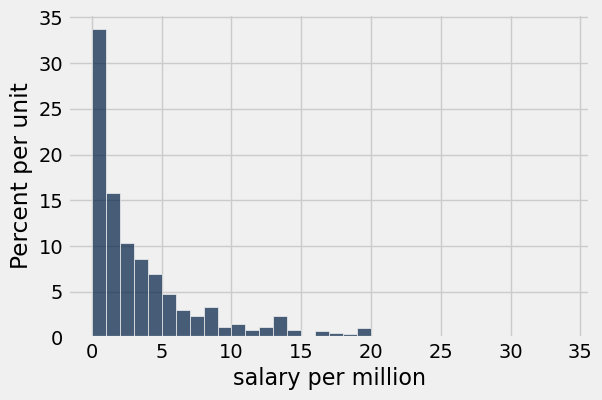

In [93]:
# Create the histogram of the player's salaries
nba13.select('salary per million').hist(bins = np.arange(0, 35, 1))

In [94]:
mean_salary = np.mean(nba13.column('salary per million'))
mean_salary

3.7790272711864401

In [95]:
sd_salary = np.std(nba13.column('salary per million'))
sd_salary

4.2816135185151234

In [96]:
nba13.sort('salary per million', descending=True).show(3)

In [97]:
30 - mean_salary

26.22097272881356

In [98]:
(30 - mean_salary)/sd_salary

6.1240867760308904

The highest paid player, Kobe Bryant, earned 6.12 standard deviations above the average.

In [99]:
nba13.sort('salary per million').show(3)

In [100]:
(0.55 - mean_salary)/sd_salary

-0.7541613126040102

In [101]:
lower_limt = mean_salary - 2 * sd_salary

In [102]:
upper_limit = mean_salary + 2 * sd_salary

In [103]:
nba13.where('salary per million', are.between(lower_limt, upper_limit)).num_rows/nba13.num_rows

0.9305084745762712

# When the Data is not Symmetric  - Chebychev's bounds
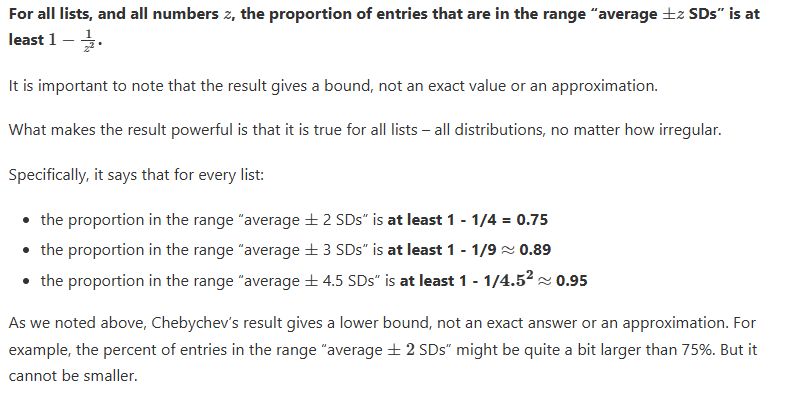

# Z Score
To determine the distance a value is from the mean we use the Z-score
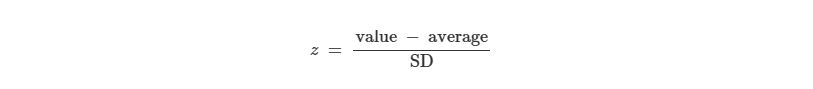

In [104]:
births = Table.read_table('baby.csv')
births

Birth Weight | Gestational Days | Maternal Age | Maternal Height | Maternal Pregnancy Weight | Maternal Smoker
120          | 284              | 27           | 62              | 100                       | False
113          | 282              | 33           | 64              | 135                       | False
128          | 279              | 28           | 64              | 115                       | True
108          | 282              | 23           | 67              | 125                       | True
136          | 286              | 25           | 62              | 93                        | False
138          | 244              | 33           | 62              | 178                       | False
132          | 245              | 23           | 65              | 140                       | False
120          | 289              | 25           | 62              | 125                       | False
143          | 299              | 30           | 66              | 136                       | True
140          | 351              | 27           | 68              | 120                       | False
... (1164 rows omitted)

In [105]:
mh_mean = np.mean(births.column('Maternal Height'))
mh_std = np.std(births.column('Maternal Height'))

In [107]:
births = births.with_columns('Height Z-scores', (births.column('Maternal Height') - mh_mean)/mh_std)
births

Birth Weight | Gestational Days | Maternal Age | Maternal Height | Maternal Pregnancy Weight | Maternal Smoker | Height Z-scores
120          | 284              | 27           | 62              | 100                       | False           | -0.811637
113          | 282              | 33           | 64              | 135                       | False           | -0.0195656
128          | 279              | 28           | 64              | 115                       | True            | -0.0195656
108          | 282              | 23           | 67              | 125                       | True            | 1.16854
136          | 286              | 25           | 62              | 93                        | False           | -0.811637
138          | 244              | 33           | 62              | 178                       | False           | -0.811637
132          | 245              | 23           | 65              | 140                       | False           | 0.37647
120          | 289              | 25           | 62              | 125                       | False           | -0.811637
143          | 299              | 30           | 66              | 136                       | True            | 0.772506
140          | 351              | 27           | 68              | 120                       | False           | 1.56458
... (1164 rows omitted)

In [110]:
within_3stds = births.where('Height Z-scores', are.between(-3, 3))
within_3stds.num_rows/births.num_rows

0.9965928449744463